In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



df_inc=pd.read_csv('../DATASETS/AHOGADOS/CSV/historico_inc_est_meteo_codigos_test.csv',sep='|',error_bad_lines=False)

In [5]:
df_inc_clust=df_inc[['Mes', 'Latitud_est', 'Longitud_est', 'Edad', 'Latitud_inc', 'Longitud_inc', 'T_med',
       'T_max', 'T_min', 'Precipitaciones', 'Dir. vi.', 'V_Viento', 'Distancia',
       'IdPronostico', 'Poblacion', 'PobProv']]



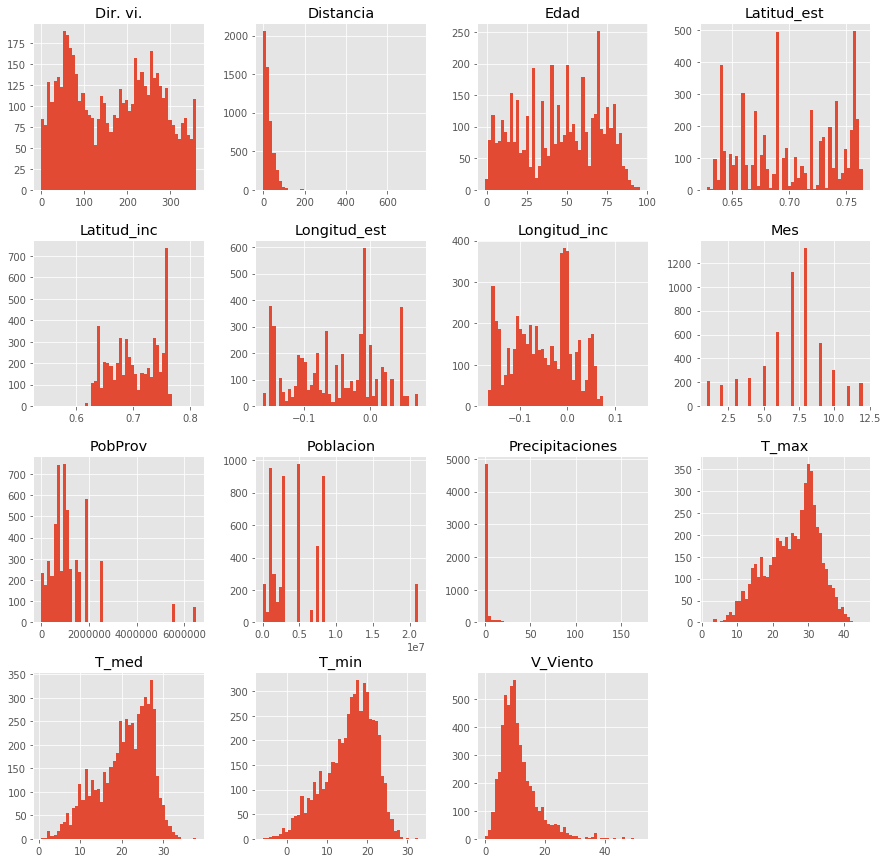

In [6]:
df_inc_clust.drop(['IdPronostico'],1).hist(figsize=(15,15), bins=50)
plt.show()

In [8]:
column_means = df_inc_clust.drop(['IdPronostico'],1).mean()
df_inc_clust = df_inc_clust.fillna(column_means)

In [9]:
df_inc_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 16 columns):
Mes                5468 non-null float64
Latitud_est        5468 non-null float64
Longitud_est       5468 non-null float64
Edad               5468 non-null float64
Latitud_inc        5468 non-null float64
Longitud_inc       5468 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Dir. vi.           5468 non-null float64
V_Viento           5468 non-null int64
Distancia          5468 non-null float64
IdPronostico       5468 non-null int64
Poblacion          5468 non-null int64
PobProv            5468 non-null int64
dtypes: float64(12), int64(4)
memory usage: 683.6 KB


In [10]:
# from sklearn.cluster import KMeans 
clusters = 7

kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(df_inc_clust.drop(['IdPronostico'],1)) 

print(kmeans.labels_)


[1 0 0 ... 4 5 1]


In [11]:
from sklearn.decomposition import PCA

pca = PCA(3) 
pca.fit(df_inc_clust.drop(['IdPronostico'],1)) 
  
pca_data = pd.DataFrame(pca.transform(df_inc_clust.drop(['IdPronostico'],1))) 
  
print(pca_data.head())


              0              1           2
0  3.563306e+06 -546283.777711  166.595649
1 -3.765839e+06   -6392.054052  100.192451
2 -3.849342e+06 -927645.081041   54.268906
3  3.581327e+06  -95427.796188  -16.299089
4 -2.122683e+06 -795928.323064  148.963210
